In [1]:
from ML.EFPs.data_loaders import load_data_top_tagging
from sklearn.ensemble import RandomForestClassifier
import joblib
import utilities.utilities as utilities

#### Loading the Dataset

In [3]:
root_data_folder = "../../../Data"
X_train, y_train = load_data_top_tagging(
    quark_data_path=f"{root_data_folder}/Trainning/q_jets_efps_d5_primed.npy", 
    gluon_data_path=f"{root_data_folder}/Trainning/g_jets_efps_d5_primed.npy",
    top_data_path=f"{root_data_folder}/Trainning/t_jets_efps_d5_primed.npy"
)
X_val, y_val = load_data_top_tagging(
    quark_data_path=f"{root_data_folder}/Validation/q_jets_efps_d5_primed.npy", 
    gluon_data_path=f"{root_data_folder}/Validation/g_jets_efps_d5_primed.npy",
    top_data_path=f"{root_data_folder}/Validation/t_jets_efps_d5_primed.npy"
)
best_features_set = [0, 1, 3, 9, 11, 12, 15, 16, 18, 22, 28, 29, 34, 38, 39, 44, 45, 48]

#### Trainning the Random Forest

In [4]:
# as a base estimator we use the decision tree for the quark-gluon tagging
random_forest = RandomForestClassifier(criterion="entropy", max_depth=10, min_samples_split=300, oob_score=True)
# trainning using only the best feature set
random_forest.fit(X_train[:, best_features_set], y_train)
print(f"Oob_score: {random_forest.oob_score_}")

Oob_score: 0.8832589329610037


#### Some quick checks

In [5]:
y_val_predict = random_forest.predict(X_val[:, best_features_set])
utilities.display_metrics(y_val, y_val_predict)

Recall: 0.9099
Precision: 0.8671
Confusion Matrix:
[[19019  3163]
 [ 2045 20643]]


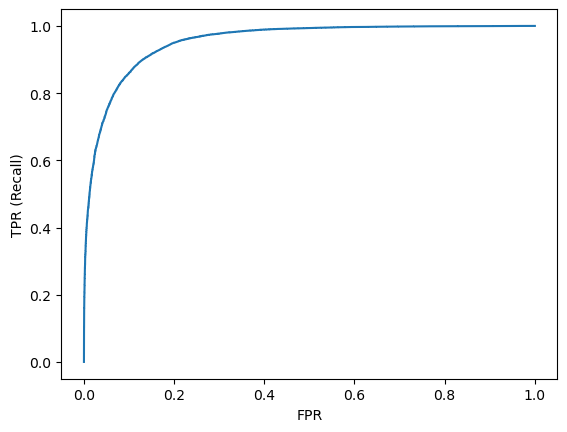

AUC: 0.9542


In [6]:
# roc curve on the validation set
y_score = random_forest.predict_proba(X_val[:, best_features_set])
utilities.display_roc_curve(y_val, y_score[:, 1])

#### Saving the model

In [7]:
with open("Top_Tagging_RandomForest.joblib", "wb") as fo:
    joblib.dump(random_forest, fo)